# PREDICTION OF LUNG CANCER USING MACHINE LEARNING

## 1. Imports

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, LabelEncoder
#from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


from sklearn.tree import plot_tree


## 2. Loading and exploring the dataset

In [6]:
dataset = pd.read_csv('survey lung cancer.csv')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
dataset.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


## 3. Statistic Summary of the dataset

In [10]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## 4. Basic informatin from the dataset

### Number of individuals with and without lungcancer 

In [11]:
dataset['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

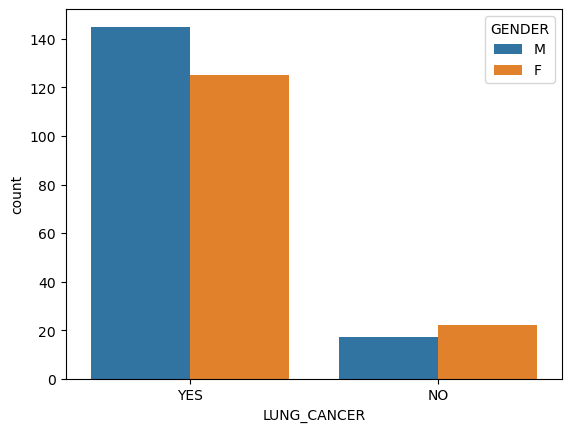

In [12]:
sns.countplot(data=dataset, x='LUNG_CANCER', hue="GENDER")

### Number of males anf females from the dataset

In [13]:
dataset ['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

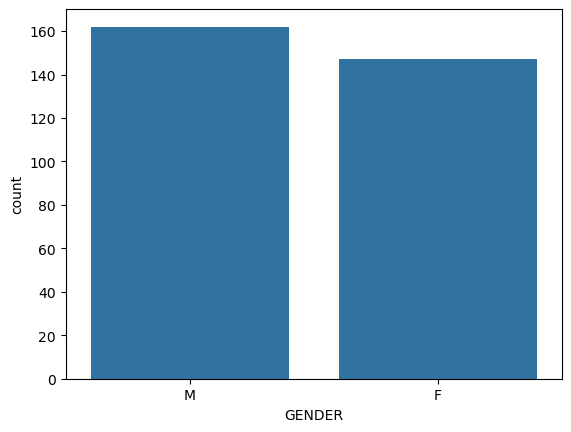

In [14]:
sns.countplot(data=dataset, x='GENDER' )

### Age analysis

<Axes: ylabel='Frequency'>

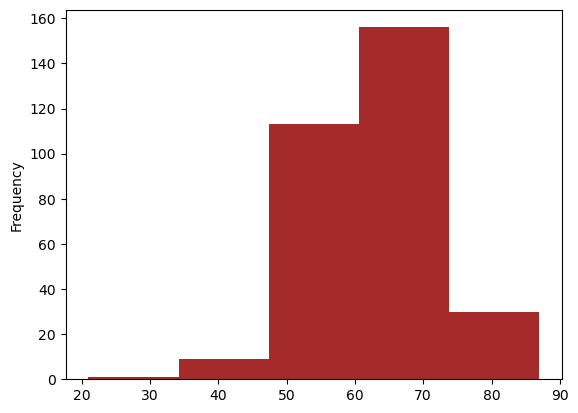

In [15]:
dataset.AGE.plot(kind='hist',bins=5,color='brown')

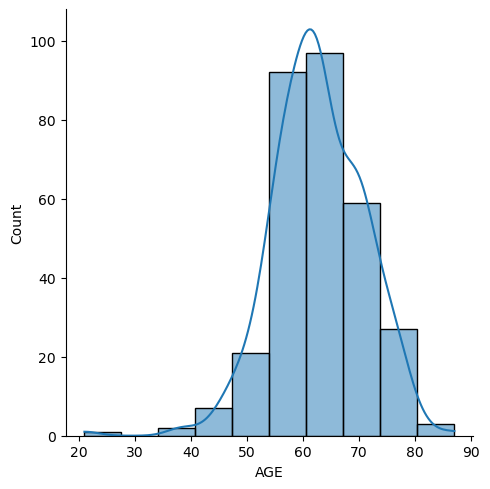

In [16]:
sns.displot(dataset['AGE'], kde=True, bins=10)

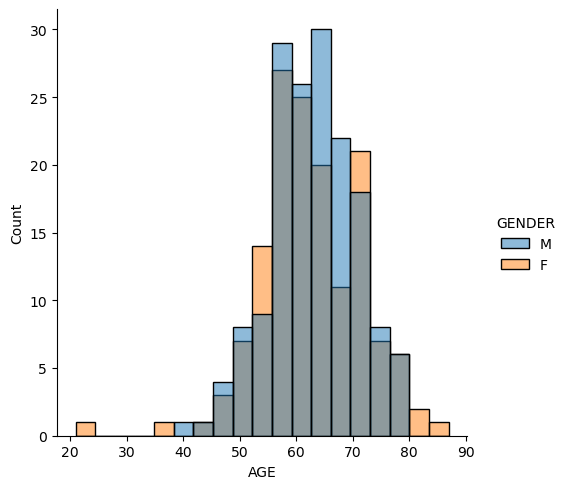

In [17]:
sns.displot(dataset, x='AGE',hue='GENDER')

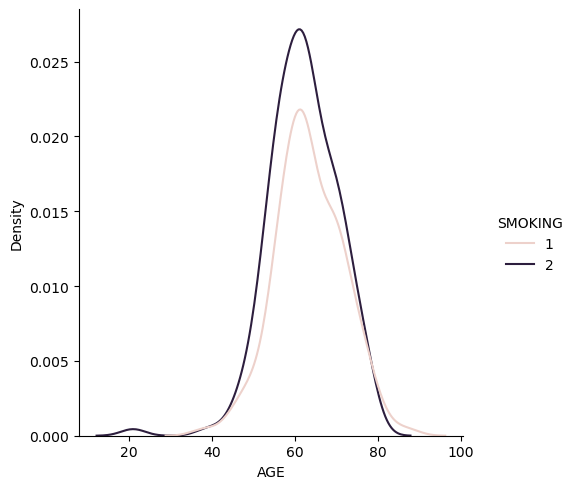

In [18]:
sns.displot(dataset,x='AGE', kind='kde', hue='SMOKING')

## 5. Data Cleaning

### Checking the missing data

In [19]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

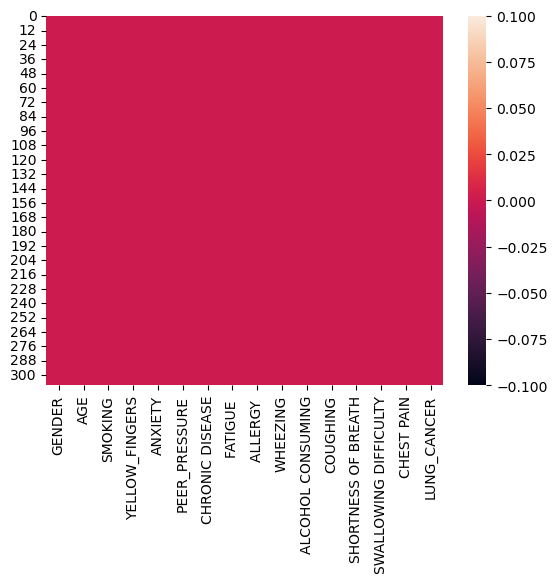

In [20]:
sns.heatmap(dataset.isnull())

## 6. Correlation analysis

### Check the correlation between variable

In [21]:
correlation_matrix = dataset.corr()


ValueError: could not convert string to float: 'M'

In [ ]:
correlation_matrix

### Visualizing the correlation matrix

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## 7. Data Preprocessing

### Encoding the dataset

In [22]:
# Convert categorical variable to numerical
label_encoder = LabelEncoder()

dataset['LUNG_CANCER'] = label_encoder.fit_transform(dataset['LUNG_CANCER'])
# YES = 1, NO = 0
dataset['GENDER'] = label_encoder.fit_transform(dataset['GENDER'])
# M = 1, F = 0

In [23]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Checking the importance of features in the anaysis

In [24]:
ds = dataset.corr()

ds['LUNG_CANCER'].sort_values(ascending=False)

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64

### Scaling numerical features

In [25]:
# new DataFrame with only the 'age' column
age = dataset[['AGE']]

# Scaling 'age' column using StandardScaler
scaler = StandardScaler()
scaled_age = scaler.fit_transform(age)

# new DataFrame with the scaled 'age' column
scaled_dataset = pd.DataFrame(scaled_age, columns=['AGE_S'])

# Concatenating the scaled 'age' column with the original dataset
dataset1 = pd.concat([dataset, scaled_dataset], axis=1)

# Displaying the head of the scaled dataset
dataset1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_S
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0.771850
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1.381829
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,-0.448107
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0.039876
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0.039876


In [26]:
dataset1.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_S
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,-0.814095
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,0.893846
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,-0.570103
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,0.527859
308,1,62,1,1,1,2,1,2,2,2,2,1,1,2,1,1,-0.082120


### New dataset

In [27]:
dataset1.drop(['AGE'], axis=1, inplace=True)

In [28]:
dataset1.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_S
0,1,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0.771850
1,1,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1.381829
2,0,1,1,1,2,1,2,1,2,1,2,2,1,2,0,-0.448107
3,1,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0.039876
4,0,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0.039876


#### Checking the missing values for the new dataset

In [29]:
dataset1.isnull().sum()

GENDER                   0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
AGE_S                    0
dtype: int64

### Feature and target separation

In [30]:
X = dataset1.drop('LUNG_CANCER', axis=1)
y = dataset1['LUNG_CANCER']

### Imbalanced data handling using SMOTE algorithm

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Creating the pipeline
pipeline = make_pipeline(
    SMOTE(random_state=42)
)

X_resampled, y_resampled = pipeline.fit_resample(X, y)

### Splitting the dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### The testing set

In [34]:
X_test

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,AGE_S
229,1,1,1,1,1,2,1,2,1,2,2,2,2,2,-0.692099
73,0,2,1,1,1,2,2,1,1,1,1,2,1,1,-0.326112
521,1,1,2,1,1,1,1,1,1,1,1,1,1,2,-2.031830
86,1,1,2,2,1,2,1,2,1,2,2,2,1,2,0.405863
469,0,1,1,1,1,2,2,1,1,1,1,2,1,1,0.039876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1,1,2,2,1,1,1,1,1,1,1,1,2,2,-1.042222
148,1,2,1,1,1,1,2,2,2,2,2,2,1,2,0.893846
46,1,2,2,1,1,2,1,2,1,1,2,2,2,2,-0.082120
93,0,1,2,2,2,2,1,2,2,2,2,2,2,1,-0.448107


In [35]:
y_test

229    1
73     1
521    0
86     1
469    0
      ..
498    0
148    1
46     1
93     1
406    0
Name: LUNG_CANCER, Length: 108, dtype: int64

## 8. Model Testing and Evaluations

#### i. Logistic Regression

In [36]:
# Create an instance of thelogistic regression model
model1 = LogisticRegression() 

# Perform cross-validation on the training set
scores1 = cross_val_score(model1, X_train, y_train, cv=5)  

# Train the model
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = model1.predict(X_test)

# Evaluate the model's performance
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
classification_report1 = classification_report(y_test, y_pred1)

print("Accuracy   :", accuracy1)
print("Precision  :", precision1)
print("Recall     :", recall1)
print("Classification Report:\n", classification_report1)
print ('Cross validation Score : ' , scores1.mean())


Accuracy   : 0.9537037037037037
Precision  : 0.9482758620689655
Recall     : 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.95      0.96      0.96        57

    accuracy                           0.95       108
   macro avg       0.95      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108

Cross validation Score :  0.9513231756214916


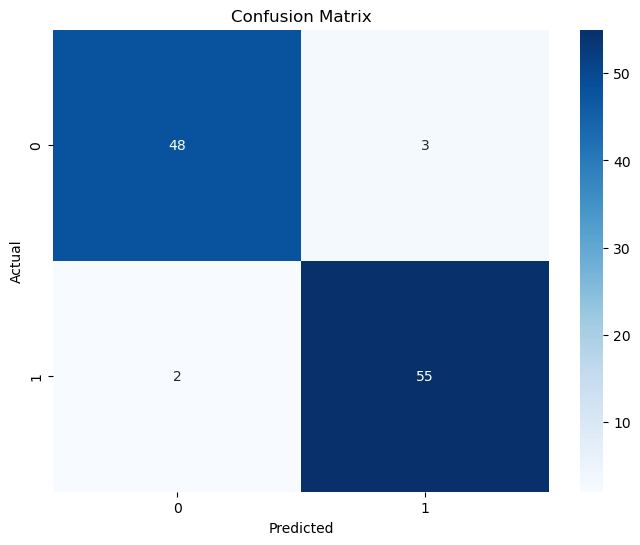

In [37]:
# visualizing the performance using confusion matrix
confusion_matrix1 = pd.crosstab(y_test, y_pred1, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### ii. KNeighbors Classifier

In [38]:
# Create an instance of the KNeighbors model
model2 = KNeighborsClassifier()  

# Perform cross-validation on the training set
scores2 = cross_val_score(model2, X_train, y_train, cv=5)  

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test)

# Evaluate the model's performance
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
classification_report2 = classification_report(y_test, y_pred2)

print("Accuracy   :", accuracy2)
print("Precision  :", precision2)
print("Recall     :", recall2)
print("Classification Report:\n", classification_report2)
print ('Cross validation Score : ' , scores2.mean())


Accuracy   : 0.9537037037037037
Precision  : 0.9814814814814815
Recall     : 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.98      0.93      0.95        57

    accuracy                           0.95       108
   macro avg       0.95      0.96      0.95       108
weighted avg       0.96      0.95      0.95       108

Cross validation Score :  0.9327987169206094


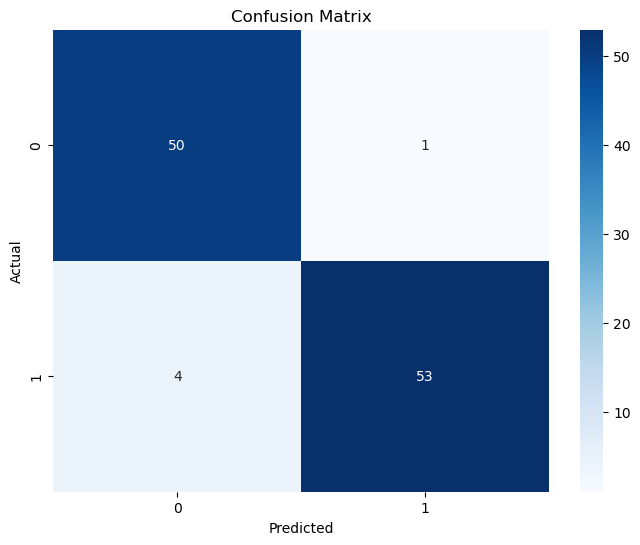

In [39]:
# visualizing the performance usign confusion matrix
confusion_matrix2 = pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix2, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### iii. NaivesBayes

In [40]:
# Create an instance of the Naive Bayes model
model3 = GaussianNB()

# Perform cross-validation on the training set
scores3 = cross_val_score(model3, X_train, y_train)  

# Train the model
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred3 = model3.predict(X_test)

# Evaluate the model's performance
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
classification_report3 = classification_report(y_test, y_pred3)

print("Accuracy   :", accuracy3)
print("Precision  :", precision3)
print("Recall     :", recall3)
print("Classification Report:\n", classification_report3)
print ('Cross Varidation Score : ' , scores3.mean())


Accuracy   : 0.9074074074074074
Precision  : 0.873015873015873
Recall     : 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90        51
           1       0.87      0.96      0.92        57

    accuracy                           0.91       108
   macro avg       0.91      0.90      0.91       108
weighted avg       0.91      0.91      0.91       108

Cross Varidation Score :  0.9096498262496657


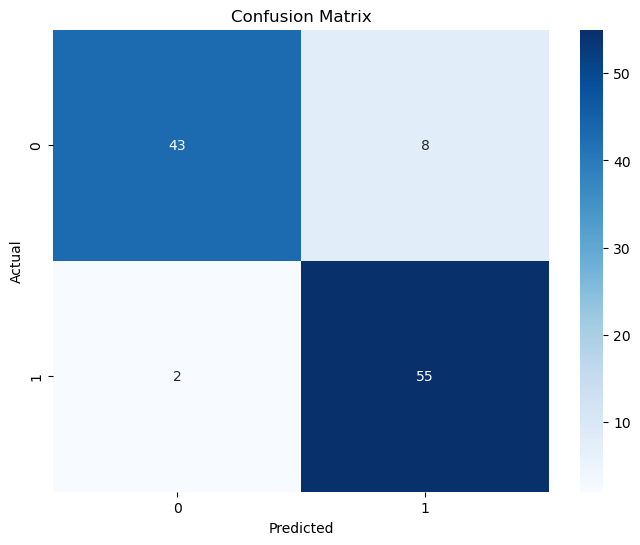

In [41]:
# visualizing the performance usintn the Confusion matrix
confusion_matrix3 = pd.crosstab(y_test, y_pred3, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix3, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### iv. RandomForest

In [42]:
# Create an instance of the RAndomForest model
model4 = RandomForestClassifier(n_estimators=100)

# Perform cross-validation on the training set
scores4 = cross_val_score(model4, X_train, y_train, cv=5) 

# Train the model
model4.fit(X_train, y_train)

# Make predictions on the test set
y_pred4 = model4.predict(X_test)

# Evaluate the model's performance
accuracy4 = accuracy_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
classification_report4 = classification_report(y_test, y_pred4)

print("Accuracy   :", accuracy4)
print("Precision  :", precision4)
print("Recall     :", recall4)
print("Classification Report:\n", classification_report4)
print ('Cross validation Score : ' , scores4.mean())



Accuracy   : 0.9722222222222222
Precision  : 0.9655172413793104
Recall     : 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.97      0.98      0.97        57

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108

Cross validation Score :  0.9537289494787491


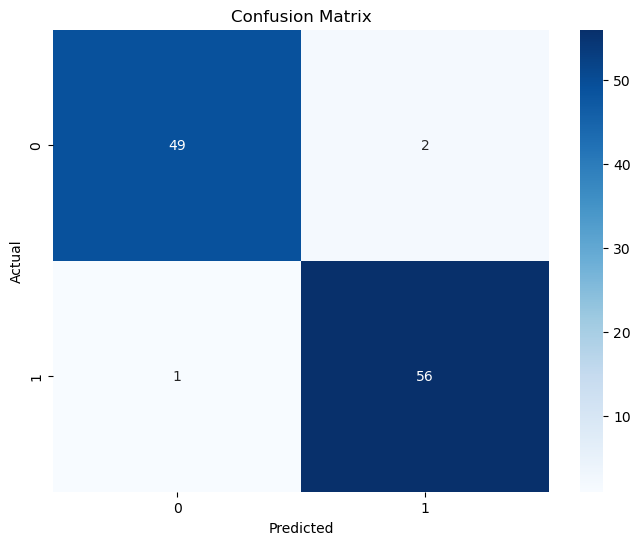

In [43]:
# visualizing the performance usign the Confusion matrix
confusion_matrix4 = pd.crosstab(y_test, y_pred4, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix4, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### v. SVC

In [44]:
# Create an instance of the SVC model
model5 = SVC()

# Perform cross-validation on the training set
scores5 = cross_val_score(model5, X_train, y_train, cv=5)  

# Train the model
model5.fit(X_train, y_train)

# Make predictions on the test set
y_pred5 = model5.predict(X_test)

# Evaluate the model's performance
accuracy5 = accuracy_score(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
classification_report5 = classification_report(y_test, y_pred5)

print("Accuracy   :", accuracy5)
print("Precision  :", precision5)
print("Recall     :", recall5)
print("Classification Report:\n", classification_report5)
print ('Cross validation Score : ' , scores5.mean())


Accuracy   : 0.9537037037037037
Precision  : 0.9642857142857143
Recall     : 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.96      0.95      0.96        57

    accuracy                           0.95       108
   macro avg       0.95      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108

Cross validation Score :  0.9606255012028869


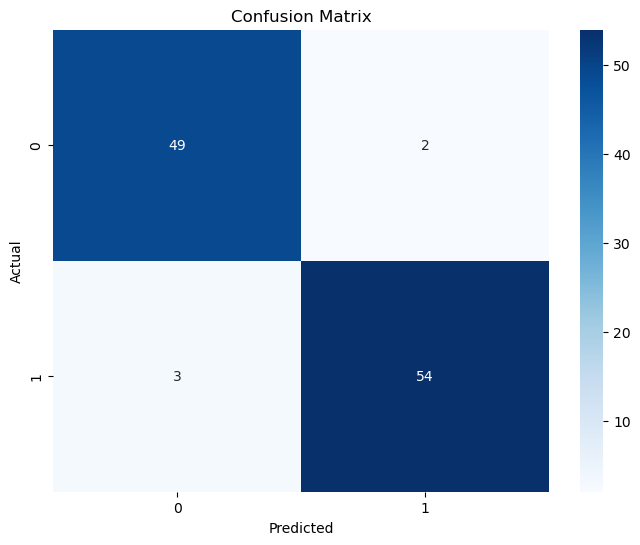

In [45]:
# visualizing the performance using the Confusion matrix
confusion_matrix5 = pd.crosstab(y_test, y_pred5, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix5, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### vi. SDG Classifier

In [46]:
# Create an instance of the SDGClassifier model
model6 = SGDClassifier()

# Perform cross-validation on the training set
scores6 = cross_val_score(model6, X_train, y_train, cv=5)  

# Train the model
model6.fit(X_train, y_train)

# Make predictions on the test set
y_pred6 = model6.predict(X_test)

# Evaluate the model's performance
accuracy6 = accuracy_score(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6)
recall6 = recall_score(y_test, y_pred6)
classification_report6 = classification_report(y_test, y_pred6)

print("Accuracy   :", accuracy6)
print("Precision  :", precision6)
print("Recall     :", recall6)
print("Classification Report:\n", classification_report6)
print ('Cross validation Score : ' , scores6.mean())


Accuracy   : 0.9351851851851852
Precision  : 0.9464285714285714
Recall     : 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.95      0.93      0.94        57

    accuracy                           0.94       108
   macro avg       0.93      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108

Cross validation Score :  0.9489975942261427


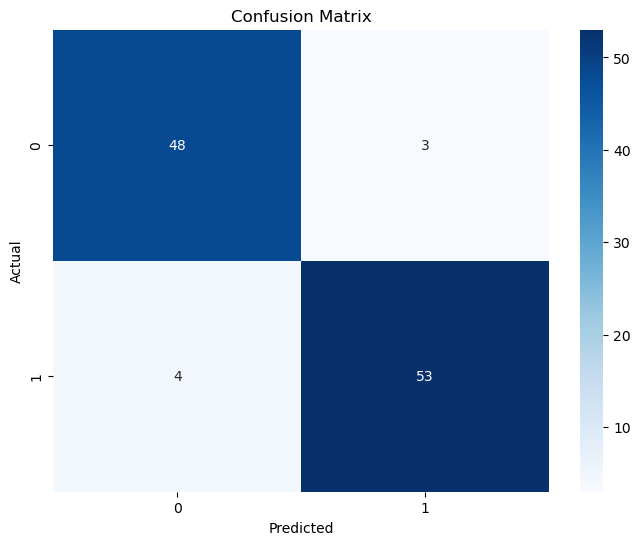

In [47]:
# visualizing the performance  using the Confusion matrix
confusion_matrix6 = pd.crosstab(y_test, y_pred6, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix6, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### vii. MLPClassifier

In [48]:
# Create an instance of the MLPClassifier model
model7 = MLPClassifier()

# Perform cross-validation on the training set
scores7 = cross_val_score(model7, X_train, y_train, cv=5)

# Train the model
model7.fit(X_train, y_train)

# Make predictions on the test set
y_pred7 = model7.predict(X_test)

# Evaluate the model's performance
accuracy7 = accuracy_score(y_test, y_pred7)
precision7 = precision_score(y_test, y_pred7)
recall7 = recall_score(y_test, y_pred7)
classification_report7 = classification_report(y_test, y_pred7)

print("Accuracy   :", accuracy7)
print("Precision  :", precision7)
print("Recall     :", recall7)
print("Classification Report:\n", classification_report7)
print ('Cross validation Score : ' , scores7.mean())


/home/nay/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nay/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nay/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/nay/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

Accuracy   : 0.9351851851851852
Precision  : 0.9310344827586207
Recall     : 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.93      0.95      0.94        57

    accuracy                           0.94       108
   macro avg       0.94      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108

Cross validation Score :  0.935231221598503


/home/nay/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


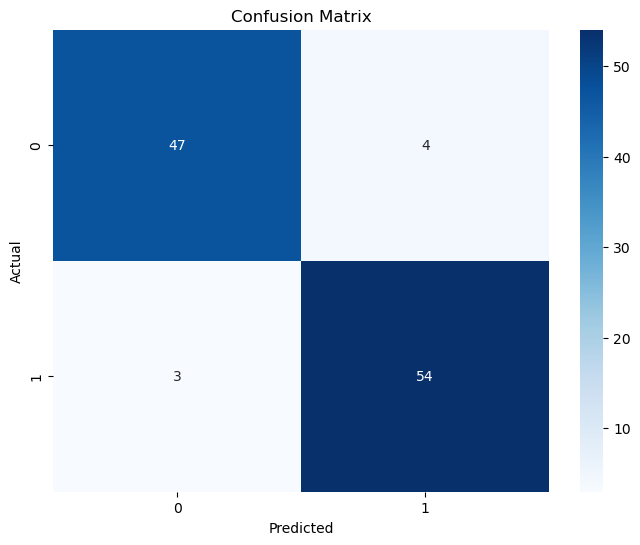

In [49]:
# visualizing the performance using the  Confusion matrix
confusion_matrix7 = pd.crosstab(y_test, y_pred7, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix7, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Comparison for the best models using validation score

#### Validation score for each model

In [51]:
from tabulate import tabulate

models = ['LogisticRegression', 'KNeighbour', 'NaiveBayes', 'RandomForest', 'SVC', 'SDG', 'MLP']
scores = [scores1.mean(), scores2.mean(), scores3.mean(), scores4.mean(), scores5.mean(), scores6.mean(), scores7.mean()]

table_data = []
for model, score in zip(models, scores):
    table_data.append([model, score])

table_headers = ['Model', 'Score']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')

print(table)

+--------------------+----------+
| Model              |    Score |
+====================+==========+
| LogisticRegression | 0.951323 |
+--------------------+----------+
| KNeighbour         | 0.932799 |
+--------------------+----------+
| NaiveBayes         | 0.90965  |
+--------------------+----------+
| RandomForest       | 0.953729 |
+--------------------+----------+
| SVC                | 0.960626 |
+--------------------+----------+
| SDG                | 0.948998 |
+--------------------+----------+
| MLP                | 0.935231 |
+--------------------+----------+


#### Graphical presentation

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNeighbour'),
  Text(2, 0, 'NaiveBayes'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'SVC'),
  Text(5, 0, 'SDG'),
  Text(6, 0, 'MLP')])

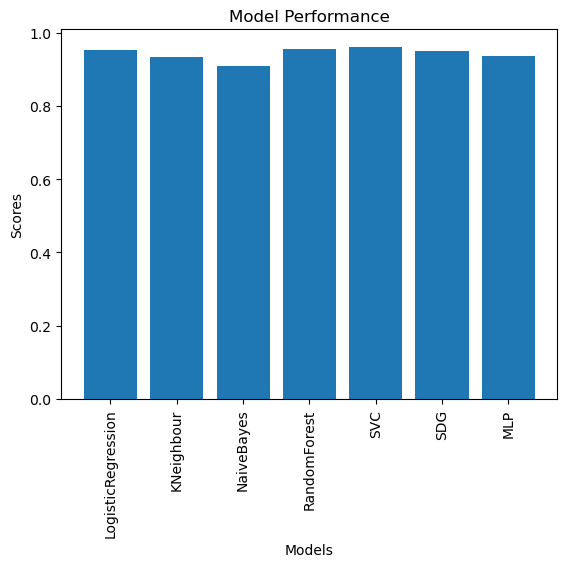

In [52]:
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance')
plt.xticks(rotation='vertical')

#### The Best model

In [53]:
h_score = 0;
for model,score in zip(models, scores):
    if score > h_score:
        h_score = score
        b_model = model
      
print('The best Classifier \n')
print(b_model,': ', h_score)

The best Classifier 

SVC :  0.9606255012028869


## 9. Predicting random case

In [54]:
# Geting the user inputs
GENDER = int(input("Gender \n 1.(M) 0.(F)"))
AGE = int(input("Age: "))

print('Type  \n 1(NO)  2(YES)')
SMOKING = int(input("Smoke :"))
YELLOW_FINGERS = int(input("Yellow fingers :"))
ANXIETY = int(input("Anxiety :"))
PEER_PRESSURE = int(input("Peer pressure :"))
CHRONIC_DISEASE = int(input("Chronic disease :"))
FATIGUE = int(input("Fatigue :"))
ALLERGY = int(input("Allergy :"))
WHEEZING = int(input("Wheezing :"))
ALCOHOL = int(input("Alcohol : "))
COUGHING = int(input("Coughing :"))
SHORTNESS_BREATH = int(input("Breath shortness"))
SWALLOWING_DIFFICULTY = int(input("Swallowing difficulty :"))
CHEST_PAIN = int(input("Chest pain:"))
              


# Assuming the entire dataset 
X = dataset.drop('LUNG_CANCER', axis=1)
y = dataset['LUNG_CANCER']

# Creating the pipeline
pipeline = Pipeline([
    ('scale', StandardScaler(with_mean=True, with_std=True)),  # Standard scaling on 'age' column
    ('model', SVC())
])

# Fitting the pipeline on the entire dataset
pipeline.fit(X, y)

# Preparing the input data for prediction
input_data = [[GENDER, AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING, ALCOHOL,COUGHING,SHORTNESS_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN]]

# Making predictions using the pipeline
predictions = pipeline.predict(input_data)

# Printing the predictions
print("Prediction:", predictions)

if (predictions[0]== 0):
    print("The person does not have Lung Cancer")
else:
        print("The person suffers from Lung Cancer")

Gender 
 1.(M) 0.(F) 1
Age:  23


Type  
 1(NO)  2(YES)


Smoke : 2
Yellow fingers : 1
Anxiety : 2
Peer pressure : 1
Chronic disease : 2
Fatigue : 1
Allergy : 2
Wheezing : 1
Alcohol :  2
Coughing : 1
Breath shortness 2
Swallowing difficulty : 1
Chest pain: 2


Prediction: [1]
The person suffers from Lung Cancer


/home/nay/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 10.Ethical consideration

##### 1.Data privacy and consent:
The data does not contain anonymized and does not contain personal identifiable information

##### 2.Informed consent:
The dataset we used has obtained informed consent from patients for the collection and use of their data for research purposes. 

##### 3.Bias and Fairness:
 The data has bias. Bias can result from historical disparities in healthcare access and treatment. 

##### 4.Transparency and Explainability:
The model is transparent and explainable to ensure the model is trusted.

##### 5.Model Interpretability:
All features were important for analysis.

##### 7.Results and Conclusions: 
In your project report, discuss the ethical considerations you've addressed throughout the project. Be transparent about any limitations or potential biases in your analysis. If your models have limitations, acknowledge them.


## 11. Conclusion

#### In conclusion, our machine learning model, trained on a lung cancer dataset, utilized various classification algorithms to predict whether a person has lung cancer or not. After rigorous training and evaluation, the best classifier emerged as Support Vectoe Classifier(SVC) , which demonstrated superior performance in terms of accuracy, precision, recall, and F1 score. The model's ability to accurately identify individuals with lung cancer holds great promise for early detection and intervention, potentially leading to improved patient outcomes and reduced mortality rates. Further validation and testing on diverse datasets are warranted to ensure the reliability and generalizability of the model. Overall, this study highlights the potential of machine learning in assisting medical professionals in the early diagnosis and management of lung cancer.